[IPython Notebook](RV.ipynb) |  [Python Script](RV.py)

'rv' Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Dataset Parameters
--------------------------

Let's add an RV dataset to the Bundle.

In [3]:
b.add_dataset('rv')
print b.filter(kind='rv')

ParameterSet: 2 parameters
      times@primary@rv01@dataset: [] d
    times@secondary@rv01@dataset: [] d


In [4]:
print b.filter(kind='rv_dep')

ParameterSet: 4 parameters
           passband@rv01@dataset: Johnson:V
   intens_weighting@rv01@dataset: energy
    ld_func@primary@rv01@dataset: interp
  ld_func@secondary@rv01@dataset: interp


For information on these passband-dependent parameters, see the section on the [lc dataset](LC) (these are used only to compute fluxes when rv_method=='flux-weighted')

### times

In [5]:
print b['times']

ParameterSet: 2 parameters
      times@primary@rv01@dataset: [] d
    times@secondary@rv01@dataset: [] d


### rvs

In [6]:
print b['rvs']

ParameterSet: 0 parameters
NO PARAMETERS


### sigmas

In [7]:
print b['sigmas']

ParameterSet: 0 parameters
NO PARAMETERS


Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to the RV dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [orb dataset](ORB)
* parameters related to meshing, eclipse detection, and subdivision (used if rv_method=='flux-weighted') are explained in the section on the [mesh dataset](MESH)
* parameters related to computing fluxes (used if rv_method=='flux-weighted') are explained in the section on the [lc dataset](LC)

In [8]:
print b['compute']

ParameterSet: 19 parameters
  dynamics_method@phoebe01@co...: keplerian
           ltte@phoebe01@compute: False
   irrad_method@phoebe01@compute: wilson
  boosting_method@phoebe01@co...: none
  eclipse_method@phoebe01@com...: native
  horizon_method@phoebe01@com...: boolean
  mesh_method@primary@phoebe0...: marching
  mesh_method@secondary@phoeb...: marching
  ntriangles@primary@phoebe01...: 1500
  ntriangles@secondary@phoebe...: 1500
  distortion_method@primary@p...: roche
  distortion_method@secondary...: roche
    atm@primary@phoebe01@compute: ck2004
  atm@secondary@phoebe01@compute: ck2004
   enabled@rv01@phoebe01@compute: True
  rv_method@primary@phoebe01@...: flux-weighted
  rv_method@secondary@phoebe0...: flux-weighted
  rv_grav@primary@phoebe01@co...: False
  rv_grav@secondary@phoebe01@...: False


### rv_method

In [9]:
print b['rv_method']

ParameterSet: 2 parameters
  rv_method@primary@phoebe01@...: flux-weighted
  rv_method@secondary@phoebe0...: flux-weighted


If rv_method is set to 'dynamical' then the computed radial velocities are simply the z-velocities of the centers of mass of each component.  In this case, only the dynamical options are relevant.  For more details on these, see the section on the [orb dataset](ORB).

If rv_method is set to 'flux-weighted' then radial velocities are determined by the z-velocity of each visible surface element of the mesh, weighted by their respective intensities.  Since the stars are placed in their orbits by the dynamic options, the section on the [orb dataset](ORB) is still applicable.  So are the meshing options described in [mesh dataset](MESH) and the options for computing fluxes in [lc dataset](LC).

### rv_grav

In [10]:
print b['rv_grav']

ParameterSet: 2 parameters
  rv_grav@primary@phoebe01@co...: False
  rv_grav@secondary@phoebe01@...: False


See the [Gravitational Redshift Example Script](../examples/grav_redshift) for more details on the influence this parameter has on radial velocities.

Synthetics
------------------

In [11]:
b.set_value_all('times', np.linspace(0,1,101))

In [12]:
b.run_compute(irrad_method='none')

<ParameterSet: 4 parameters | components: primary, secondary>

In [13]:
b['rv@model'].twigs

['times@primary@rv01@phoebe01@latest@rv@model',
 'rvs@primary@rv01@phoebe01@latest@rv@model',
 'times@secondary@rv01@phoebe01@latest@rv@model',
 'rvs@secondary@rv01@phoebe01@latest@rv@model']

In [14]:
print b['times@primary@rv@model']

Parameter: times@primary@latest@model
                       Qualifier: times
                     Description: Observed times
                           Value: [0.   0.01 0.02 ... 0.98 0.99 1.  ] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [15]:
print b['rvs@primary@rv@model']

Parameter: rvs@primary@latest@model
                       Qualifier: rvs
                     Description: Observed radial velocity
                           Value: [  0.6384468  -40.16177632 -40.16909745 ...  40.17432856
  40.15661595   0.6384468 ] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: times:<notempty>



Plotting
---------------

By default, RV datasets plot as 'rvs' vs 'times'.

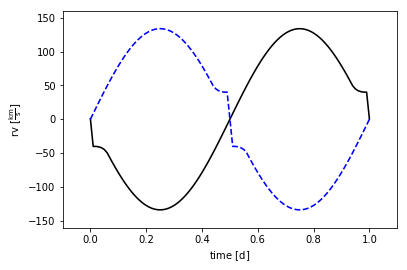

In [16]:
afig, mplfig = b['rv@model'].plot(show=True)

Since these are the only two columns available in the synthetic model, the only other options is to plot in phase instead of time.

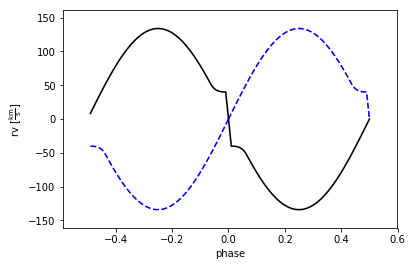

In [17]:
afig, mplfig = b['rv@model'].plot(x='phases', show=True)

In system hierarchies where there may be multiple periods, it is also possible to determine whose period to use for phasing.

In [18]:
b['period'].components

['binary', 'primary', 'secondary']

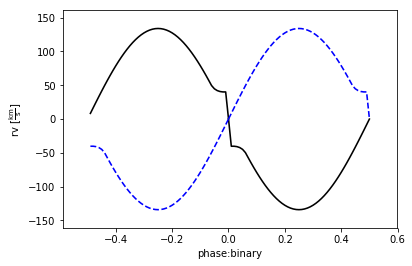

In [19]:
afig, mplfig = b['rv@model'].plot(x='phases:binary', show=True)

Mesh Fields
---------------------


By adding a mesh dataset and setting the columns parameter, radial velocities per-element quantities can be exposed and plotted.  Since the radial velocities are flux-weighted, the flux-related quantities are also included.  For a description of these, see the section on the [lc dataset](LC).

Let's add a mesh at the first time of the rv dataset and re-call run_compute

In [20]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [21]:
print b['columns'].choices

['pot', 'rpole', 'volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs', 'intensities@rv01', 'normal_intensities@rv01', 'abs_intensities@rv01', 'abs_normal_intensities@rv01', 'boost_factors@rv01', 'ldint@rv01', 'pblum@rv01', 'abs_pblum@rv01', 'ptfarea@rv01', 'rvs@rv01']


In [22]:
b['columns'] = ['rvs@rv01']

In [23]:
b.run_compute(irrad_method='none')

Thu, 04 Oct 2018 15:12 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 12 parameters | kinds: rv, mesh>

In [24]:
print b['model'].datasets

['mesh01', 'rv01']


These new columns are stored with the rv's dataset tag, but with the mesh model-kind.

In [25]:
b.filter(dataset='rv01', kind='mesh', context='model').twigs

['00.000000@rvs@primary@rv01@phoebe01@latest@mesh@model',
 '00.000000@rvs@secondary@rv01@phoebe01@latest@mesh@model']

Any of these columns are then available to use as edge or facecolors when plotting the mesh (see the section on the [MESH dataset](MESH)).

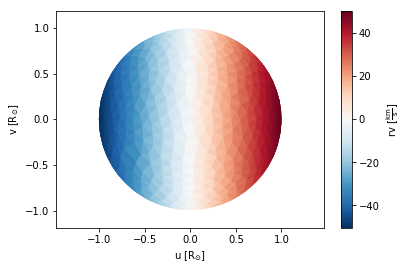

In [26]:
afig, mplfig = b['mesh01@model'].plot(fc='rvs', ec='None', show=True)

### rvs

In [27]:
print b['rvs@primary@rv01@mesh@model']

Parameter: 00.000000@rvs@primary@latest@model
                       Qualifier: rvs
                     Description: Per-element value of rvs for rv01 dataset
                           Value: [-3.51428103e+00 -1.88225026e-05  3.51419791e+00 ...
  3.84090451e+01  3.72780179e+01  3.84944182e+01] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None

